In [ ]:
!C:\Users\victo\AppData\Local\Programs\Python\Python311\python.exe -m pip install tensorflow[and-cuda]

In [ ]:
!pip install pandas
!pip install scikit-learn
!pip install matplotlib 
!pip install seaborn
!pip install tensorflow
!pip install numpy
!pip install tensorflow-io


In [56]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

In [ ]:
# NO EJECUTAR, solo experimentación
# Configurar TensorFlow para utilizar la GPU
# physical_devices = tf.config.list_physical_devices('GPU')
# print (physical_devices)
# if len(physical_devices) > 0:
#    tf.config.experimental.set_memory_growth(physical_devices[0], True)
#    print("configurado")

In [34]:
# Cargar el CSV
archivo_csv = os.path.join('..', '..', 'data', 'fact_licitacion-2007_2023-full.csv')
df_csv = pd.read_csv(archivo_csv, encoding="ISO-8859-1", delimiter=",")

In [46]:
df = df_csv.copy()

In [47]:
df.dtypes

id_fecha                       int64
id_rubro                       int64
id_sector                      int64
id_organismo                   int64
id_unidad                      int64
id_producto                    int64
id_zona                        int64
codigo_moneda                  int64
cantidad_adjudicada          float64
monto_unitario_oferta_usd    float64
monto_adjudicado_usd         float64
dtype: object

In [48]:
# Convertir la fecha a tipo datetime
df['id_fecha'] = pd.to_datetime(df['id_fecha'], format='%Y%m%d')

# 1. Crear características de fecha
df['mes'] = df['id_fecha'].dt.month
df['año'] = df['id_fecha'].dt.year


In [62]:
# Seno y coseno del año y mes
timestamp_s = df['id_fecha'].map(pd.Timestamp.timestamp)
day = 24*60*60
mes = day*(365.2425/12)
year = (365.2425)*day

df['dia sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['dia cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['mes sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['mes cos'] = np.cos(timestamp_s * (2 * np.pi / year))
df['año sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['año cos'] = np.cos(timestamp_s * (2 * np.pi / year))

Text(0.5, 1.0, 'Time of day signal')

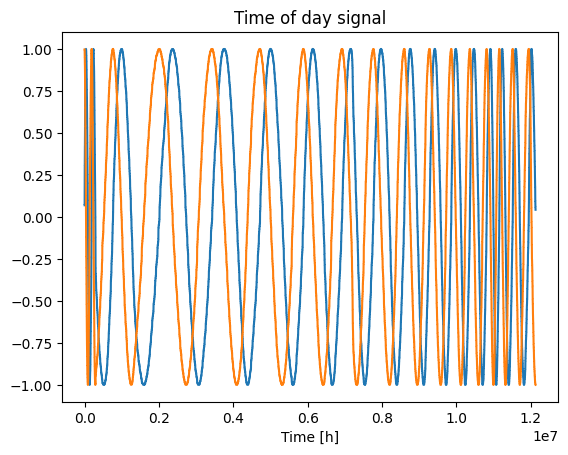

In [63]:
plt.plot(np.array(df['mes sin']))
plt.plot(np.array(df['mes cos']))
plt.xlabel('Time [h]')
plt.title('Time of day signal')

Text(0.5, 1.0, 'Time of year signal')

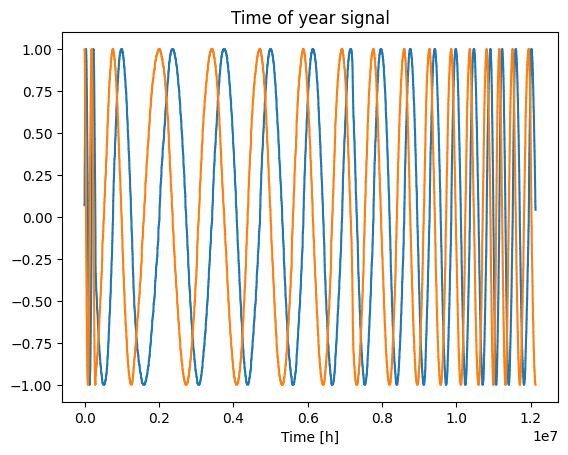

In [55]:
plt.plot(np.array(df['año sin']))
plt.plot(np.array(df['año cos']))
plt.xlabel('Time [h]')
plt.title('Time of year signal')

In [64]:
df

,id_fecha,id_rubro,id_sector,id_organismo,id_unidad,id_producto,id_zona,codigo_moneda,cantidad_adjudicada,monto_unitario_oferta_usd,monto_adjudicado_usd,mes,año,dia sin,dia cos,año sin,año cos,mes sin,mes cos
0,2007-01-05,1986,5,100523,3762,51101720,8103,2,100.0,1.813102,181.310244,1,2007,1.847585e-12,1.0,0.069229,0.997601,0.069229,0.997601
1,2007-01-05,1986,5,100523,3762,51101720,8103,2,100.0,0.499528,49.952822,1,2007,1.847585e-12,1.0,0.069229,0.997601,0.069229,0.997601
2,2007-01-05,483,5,100523,3762,51101811,8103,2,6000.0,0.035152,210.911917,1,2007,1.847585e-12,1.0,0.069229,0.997601,0.069229,0.997601
3,2007-01-05,483,5,100523,3762,51101815,8103,2,20.0,2.386635,47.732697,1,2007,1.847585e-12,1.0,0.069229,0.997601,0.069229,0.997601
4,2007-01-05,483,5,100523,3762,51101815,8103,2,100.0,0.536530,53.653031,1,2007,1.847585e-12,1.0,0.069229,0.997601,0.069229,0.997601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12126453,2023-06-30,988,4,7081,1757,93141802,13101,2,1.0,3625.577839,3625.577839,6,2023,-8.807102e-12,1.0,0.042543,-0.999095,0.042543,-0.999095
12126454,2023-06-30,495,5,7051,5041,93141907,16204,2,1.0,8037.150948,8037.150948,6,2023,-8.807102e-12,1.0,0.042543,-0.999095,0.042543,-0.999095
12126455,2023-06-30,1994,1,111875,4043,93151505,5101,2,1.0,9455.288218,9455.288218,6,2023,-8.807102e-12,1.0,0.042543,-0.999095,0.042543,-0.999095
12126456,2023-06-30,2299,5,118069,4822,94121501,16102,2,1.0,3929.197479,3929.197479,6,2023,-8.807102e-12,1.0,0.042543,-0.999095,0.042543,-0.999095


In [65]:
nombre_columna_objetivo = 'monto_adjudicado_usd'
columnas_categoricas = ['id_producto']
columnas_numericas = ['año sin', 'año cos', 'mes sin', 'mes cos']
columnas_utilizadas = columnas_numericas + columnas_categoricas + [nombre_columna_objetivo]


In [66]:
df = df.query(nombre_columna_objetivo + ' >= 0')

In [67]:
def filtrar_por_desviacion_estandar(df, factor=1):
    # Calcular la media y la desviación estándar para cada id_producto
    grouped_stats = df.groupby('id_producto')['monto_adjudicado_usd'].agg(['mean', 'std', 'count']).reset_index()

    # Calcular los límites inferior y superior para cada id_producto
    grouped_stats['lower_limit'] = grouped_stats['mean'] - factor * grouped_stats['std']
    grouped_stats['upper_limit'] = grouped_stats['mean'] + factor * grouped_stats['std']

    # Fusionar los límites con el DataFrame original
    df_merged = pd.merge(df, grouped_stats[['id_producto', 'lower_limit', 'upper_limit', 'count']], on='id_producto')

    # quito los productos con pocos registros
    meses = ((2022 - 2007) * 12) / 2
    df_merged = df_merged.query('count > ' + str(meses))

    # Filtrar los registros que están dentro del rango definido por los límites
    df_filtered = df_merged[(df_merged['monto_adjudicado_usd'] >= df_merged['lower_limit']) & 
                            (df_merged['monto_adjudicado_usd'] <= df_merged['upper_limit'])]

    return df_filtered

In [68]:
df = filtrar_por_desviacion_estandar(df[columnas_utilizadas])

In [69]:
print(df.shape)

(11681065, 9)


{'whiskers': [<matplotlib.lines.Line2D at 0x167d3239580>,
 'caps': [<matplotlib.lines.Line2D at 0x167d3239ac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x167d32392e0>],
 'medians': [<matplotlib.lines.Line2D at 0x167d3134c70>],
 'fliers': [<matplotlib.lines.Line2D at 0x167d31346a0>],
 'means': []}

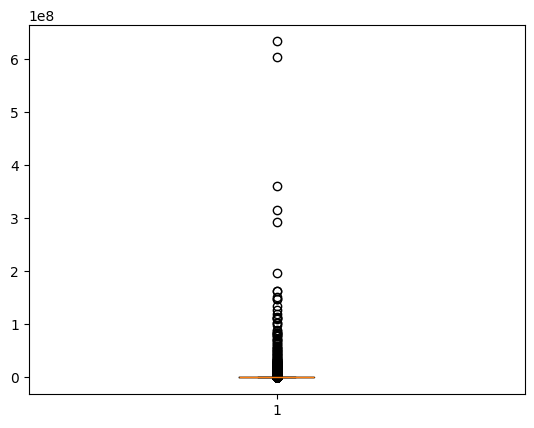

In [70]:
plt.boxplot(df[nombre_columna_objetivo])

In [71]:
# Calcula el primer y tercer cuartil (Q1 y Q3) de la columna 'cantidad_adjudicada'
Q1 = df[nombre_columna_objetivo].quantile(0.25)
Q3 = df[nombre_columna_objetivo].quantile(0.75)

# Calcula el rango intercuartil (IQR)
IQR = Q3 - Q1

# Define un factor multiplicativo para ajustar el umbral (por ejemplo, 1.5 veces el IQR)
factor_umbral = 1.5

# Calcula el valor umbral
umbral = Q3 + factor_umbral * IQR


# Crea una nueva columna llamada 'segmento' en función del valor umbral
df['segmento'] = [1 if x < umbral else 2 for x in df[nombre_columna_objetivo]]

In [72]:
df_segm_1 = df[df['segmento'] == 1]
df_segm_2 = df[df['segmento'] == 2]
print([df_segm_1.shape,df_segm_2.shape])

[(9945088, 10), (1735977, 10)]


In [73]:
df_segm_1

,año sin,año cos,mes sin,mes cos,id_producto,monto_adjudicado_usd,lower_limit,upper_limit,count,segmento
0,0.069229,0.997601,0.069229,0.997601,51101720,181.310244,-5.843810e+03,7.359230e+03,2407,1
1,0.069229,0.997601,0.069229,0.997601,51101720,49.952822,-5.843810e+03,7.359230e+03,2407,1
2,0.432934,0.901426,0.432934,0.901426,51101720,46.252613,-5.843810e+03,7.359230e+03,2407,1
3,0.661629,0.749831,0.661629,0.749831,51101720,27.882969,-5.843810e+03,7.359230e+03,2407,1
4,0.661629,0.749831,0.661629,0.749831,51101720,50.897483,-5.843810e+03,7.359230e+03,2407,1
...,...,...,...,...,...,...,...,...,...,...
12124043,0.160833,0.986982,0.160833,0.986982,101101001,0.001216,-6.855663e+06,1.121040e+07,2541,1
12124186,0.988248,0.152858,0.988248,0.152858,101101001,0.001251,-6.855663e+06,1.121040e+07,2541,1
12124220,0.998738,0.050222,0.998738,0.050222,101101001,0.001251,-6.855663e+06,1.121040e+07,2541,1
12124255,0.999454,0.033034,0.999454,0.033034,101101001,0.001251,-6.855663e+06,1.121040e+07,2541,1


{'whiskers': [<matplotlib.lines.Line2D at 0x1684ee2c4c0>,
 'caps': [<matplotlib.lines.Line2D at 0x16d1a74aee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1684ee2cdc0>],
 'medians': [<matplotlib.lines.Line2D at 0x16d1a74ab20>],
 'fliers': [<matplotlib.lines.Line2D at 0x16d1a74af70>],
 'means': []}

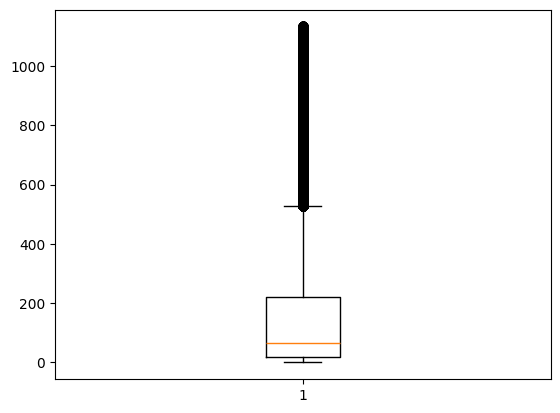

In [74]:
plt.boxplot(df_segm_1[nombre_columna_objetivo])

In [75]:
df_segm_1  = filtrar_por_desviacion_estandar(df_segm_1[columnas_utilizadas])
df_segm_1.shape

(8464246, 9)

{'whiskers': [<matplotlib.lines.Line2D at 0x168a9491f10>,
 'caps': [<matplotlib.lines.Line2D at 0x168a9491eb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x168a9491220>],
 'medians': [<matplotlib.lines.Line2D at 0x168a9491af0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1673e7c54f0>],
 'means': []}

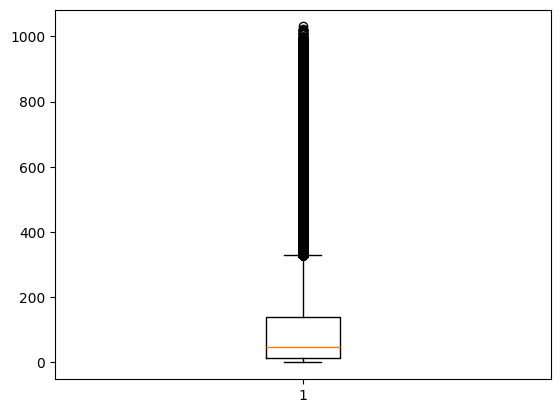

In [76]:
plt.boxplot(df_segm_1[nombre_columna_objetivo])

In [77]:
# Dividir el conjunto de datos en características (X) y objetivo (y)
X = df_segm_1[columnas_numericas + columnas_categoricas]
y = df_segm_1[nombre_columna_objetivo]

In [78]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

print(f'Tamaño set de entrenamientos: X: {X_train.shape} y: {y_train.shape}')
print(f'Tamaño set de validacion: X: {X_valid.shape} y: {y_valid.shape}')
print(f'Tamaño set de prueba: X: {X_test.shape} y: {y_test.shape}')


Tamaño set de entrenamientos: X: (6771396, 5) y: (6771396,)
Tamaño set de validacion: X: (846425, 5) y: (846425,)
Tamaño set de prueba: X: (846425, 5) y: (846425,)


# Técnica de escalado
Utiliza esta o ONE-HOT, no ambas

In [79]:
# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [80]:
df_train_scaled = pd.DataFrame(X_train_scaled, columns=[X_train.columns])
df_train_scaled.head()

,año sin,año cos,mes sin,mes cos,id_producto
0,-0.860757,1.124063,-0.860757,1.124063,-0.781741
1,-0.493716,-1.317494,-0.493716,-1.317494,-0.270205
2,1.103170,0.907503,1.103170,0.907503,-1.887699
3,0.262707,1.408770,0.262707,1.408770,0.053213
4,1.174931,-0.791654,1.174931,-0.791654,-1.887699


# AHORA ENTRENA

In [87]:
np.random.seed(461)

# Construir el modelo de red neuronal con Keras
model = Sequential([
    Dense(5, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)  # Capa de salida, ya que es un problema de regresión
])

In [ ]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

In [ ]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

In [ ]:
CONV_WIDTH=3

conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

In [ ]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [82]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

model = Sequential([
    Dense(5, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=l2(0.01)),
    Dropout(0.2),  # Agrega una capa de Dropout para reducir el sobreajuste
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    Dense(1, activation='linear')
])


In [88]:
learning_rate = 0.002
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(loss='mean_absolute_error', optimizer=optimizer, metrics=["mae"])  # Cambiar la métrica a 'mae'

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 5)                 30        
                                                                 
 dense_19 (Dense)            (None, 64)                384       
                                                                 
 dense_20 (Dense)            (None, 1)                 65        
                                                                 
Total params: 479 (1.87 KB)
Trainable params: 479 (1.87 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compilar el modelo
# model.compile(optimizer='adam', loss='mean_squared_error')

In [22]:
from tensorflow.keras.models import load_model
model = load_model(os.path.join('modelos', 'eliminada-ds-mae-64-32-1.h5'))

In [ ]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [ ]:
history = compile_and_fit(dense, single_step_window)
history = compile_and_fit(multi_step_dense, conv_window)
history = compile_and_fit(conv_model, conv_window)
history = compile_and_fit(lstm_model, wide_window)

In [89]:
# Entrenar el modelo
# score = model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_split=0.2)
score = model.fit(X_train_scaled, y_train, epochs=5, batch_size=32, validation_data=(X_valid_scaled, y_valid), verbose=1, shuffle=True)


Epoch 1/5
211607/211607 [==============================] - 126s 591us/step - loss: 83.5215 - mae: 83.5215 - val_loss: 83.2314 - val_mae: 83.2314
Epoch 2/5
211607/211607 [==============================] - 121s 574us/step - loss: 83.0557 - mae: 83.0557 - val_loss: 82.5510 - val_mae: 82.5510
Epoch 3/5
211607/211607 [==============================] - 126s 595us/step - loss: 82.5624 - mae: 82.5624 - val_loss: 82.3552 - val_mae: 82.3552
Epoch 4/5
211607/211607 [==============================] - 126s 595us/step - loss: 82.4277 - mae: 82.4277 - val_loss: 82.3463 - val_mae: 82.3463
Epoch 5/5
211607/211607 [==============================] - 206s 972us/step - loss: 82.3621 - mae: 82.3621 - val_loss: 82.2675 - val_mae: 82.2675


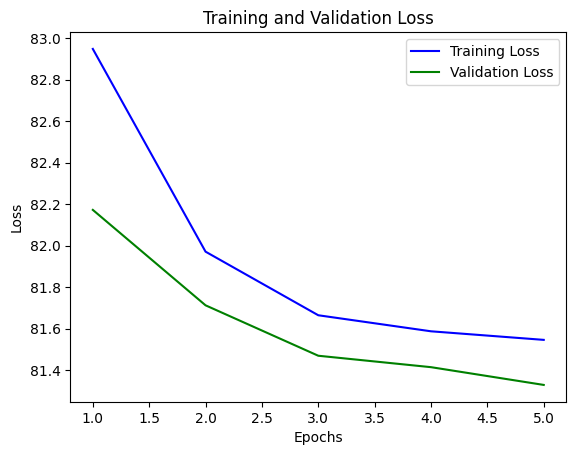

In [86]:
# Extraer la pérdida y la validación de la pérdida del historial
loss = score.history['loss']
val_loss = score.history['val_loss']

# Crear un gráfico de línea para visualizar la pérdida durante el entrenamiento
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'g-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model.save(os.path.join("modelos", "eliminada-ds-mae-64-32-1.h5"))

# Predecir

In [25]:
df_productos = df_segm_1[['id_producto']]

In [26]:
df_productos

,id_producto
0,51101720
1,51101720
2,51101720
3,51101720
4,51101720
...,...
9945015,51191502
9945016,51191502
9945021,51191502
9945023,51191502


In [29]:
df_productos = df_productos.drop_duplicates()

In [30]:
df_productos

,id_producto
0,51101720
2299,51101811
3637,51101815
9774,51131607
12612,51141502
...,...
9944096,23151514
9944201,77121608
9944348,51141723
9944565,51121765


In [33]:
años_meses = [(2023, 10), (2023, 11), (2023, 12), (2024, 1)]

dfs = []

for año, mes in años_meses:
    # Crea un DataFrame con la combinación de año y mes actual
    df_temp = pd.DataFrame({'año': [año]*len(df_productos),
                            'mes': [mes]*len(df_productos),
                            'id_producto': df_productos['id_producto'].tolist()})
    # Agrega el DataFrame al listado
    dfs.append(df_temp)

# Concatena todos los DataFrames en uno solo
x_prediccion = pd.concat(dfs, ignore_index=True)

In [34]:
x_prediccion

,año,mes,id_producto
0,2023,10,51101720
1,2023,10,51101811
2,2023,10,51101815
3,2023,10,51131607
4,2023,10,51141502
...,...,...,...
25659,2024,1,23151514
25660,2024,1,77121608
25661,2024,1,51141723
25662,2024,1,51121765


In [35]:
X_prediccion_scaled = scaler.transform(x_prediccion)

# 4. Hacer predicciones utilizando el modelo entrenado
predicciones = model.predict(X_prediccion_scaled)

# Las predicciones ahora contienen los valores predichos para las instancias en df_prediccion_segm_1

# Imprimir algunas de las predicciones
print(predicciones)


802/802 [==============================] - 0s 444us/step
[[72.64293 ]
 [72.645256]
 [72.645325]
 ...
 [47.832047]
 [47.59148 ]
 [48.432045]]


In [37]:
x_prediccion['prediccion'] = predicciones

In [38]:
x_prediccion

,año,mes,id_producto,prediccion
0,2023,10,51101720,72.642929
1,2023,10,51101811,72.645256
2,2023,10,51101815,72.645325
3,2023,10,51131607,73.409676
4,2023,10,51141502,73.663544
...,...,...,...,...
25659,2024,1,23151514,59.984982
25660,2024,1,77121608,77.087212
25661,2024,1,51141723,47.832047
25662,2024,1,51121765,47.591480


In [47]:
x_prediccion.describe()

,año,mes,id_producto,prediccion
count,25664.000000,25664.000000,2.566400e+04,25664.000000
mean,2023.250000,8.500000,4.326115e+07,72.454620
std,0.433021,4.387568,1.616480e+07,40.962784
min,2023.000000,1.000000,1.010150e+07,4.013367
25%,2023.000000,7.750000,3.121151e+07,47.361830
50%,2023.000000,10.500000,4.227191e+07,72.225830
75%,2023.250000,11.250000,5.115161e+07,90.585625
max,2024.000000,12.000000,1.000000e+08,272.889618
